In [0]:
import pandas as pd
from fbprophet import Prophet 
df = pd.read_csv('https://raw.githubusercontent.com/danielcaraway/data/master/Zip_Zhvi_SingleFamilyResidence.csv', encoding='latin')

In [0]:
# first
to_drop = "1996-04	1996-05	1996-06	1996-07	1996-08	1996-09	1996-10	1996-11	1996-12".split()
dropped = df.drop(to_drop, axis=1)
top = dropped.head(10)

# df_97 = df.drop(to_drop, axis=1)
# top = df_97.sort_values(by="1997-01").head(10)
# top = dropped.sort_values(by="1997-01", ascending=False).head(10)
top = dropped.sort_values(by="1997-01").head(10)

# top = dropped.sort_values(by="2019-12",ascending=False).head(10)
# top = dropped.sort_values(by="2019-12").head(10)

In [0]:
# top

In [0]:
def make_df(y, ds):
  # print(regionName)
  # df = df[df['RegionName'] == regionName]
  # df_t = df.loc[:, '1996-04'::].T
  # print(y.values)
  # return y.values
  row_df = pd.DataFrame({ "y": y.values, "ds": ds })
  return row_df

# def make_df(y, ds, city):
#   # print(regionName)
#   # df = df[df['RegionName'] == regionName]
#   # df_t = df.loc[:, '1996-04'::].T
#   # print(y.values)
#   # return y.values
#   row_df = pd.DataFrame({ "y": y.values, "ds": ds, "city": city })
#   return row_df


In [139]:
top.columns[7:]

Index(['1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06',
       '1997-07', '1997-08', '1997-09', '1997-10',
       ...
       '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
       '2019-09', '2019-10', '2019-11', '2019-12'],
      dtype='object', length=276)

In [0]:
ds = top.columns[7:]
top['df'] = top.apply(lambda x: make_df(x['1997-01'::], ds), axis=1) 


def get_all(x):
  string = "" + x['City'] +", "+  x['State'] +", "+ str(x['RegionName'])
  return string
top['combined'] = top.apply(lambda x: get_all(x), axis=1)
# top['df'] = top.apply(lambda x: make_df(x['1996-04'::], ds, x['City']), axis=1) 
# top['y'] = top.apply(lambda x: make_df(x['1996-04'::]), axis=1) 


In [0]:
# top

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning:

Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as fl

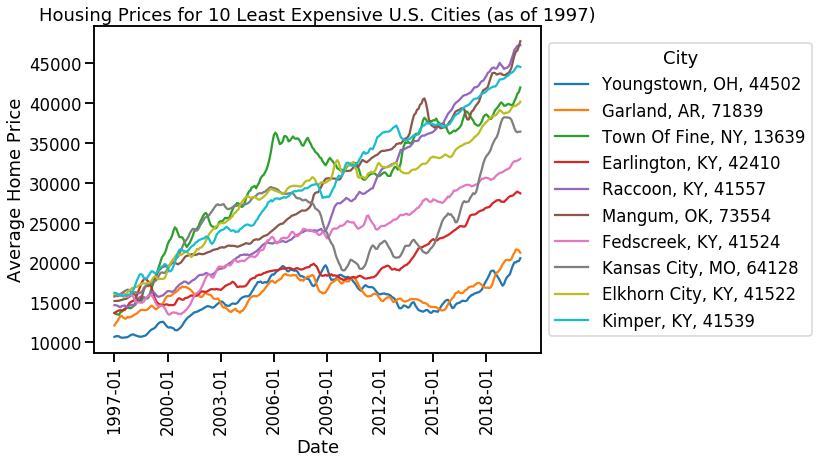

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

with sns.plotting_context("talk"):
  plt.figure(figsize=(8, 6))
  plt.plot('ds', 'y', data = top.iloc[0]['df'], label = ''+ top.iloc[0]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[1]['df'], label = ''+ top.iloc[1]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[2]['df'], label = ''+ top.iloc[2]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[3]['df'], label = ''+ top.iloc[3]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[4]['df'], label = ''+ top.iloc[4]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[5]['df'], label = ''+ top.iloc[5]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[6]['df'], label = ''+ top.iloc[6]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[7]['df'], label = ''+ top.iloc[7]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[8]['df'], label = ''+ top.iloc[8]['combined'] + '')
  plt.plot('ds', 'y', data = top.iloc[9]['df'], label = ''+ top.iloc[9]['combined'] + '')
  unique_dates = sorted(list(top.iloc[0]['df']['ds'].drop_duplicates()))
  date_ticks = range(0, len(unique_dates), 36)
  plt.title('Housing Prices for 10 Least Expensive U.S. Cities (as of 1997)')
  plt.xlabel('Date')
  plt.ylabel('Average Home Price')
  plt.xticks(date_ticks, rotation='vertical');
  plt.legend(loc = "center left", bbox_to_anchor = (1,.5), title = "City" )
  
  # plt.set_xticklabels([unique_dates[i].strftime('%d %b') for i in date_ticks], rotation='vertical');
  # plt.set_xlabel('Date');

In [8]:
top.iloc[0]['df']['y']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
280    1399918
281    1380178
282    1358401
283    1350481
284    1345845
Name: y, Length: 285, dtype: object

In [47]:
for i in range(10):
  print("plt.plot('ds', 'y', data = top.iloc["+str(i)+"]['df'], label = ''+ top.iloc["+str(i)+"]['combined'] + '')")

plt.plot('ds', 'y', data = top.iloc[0]['df'], label = ''+ top.iloc[0]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[1]['df'], label = ''+ top.iloc[1]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[2]['df'], label = ''+ top.iloc[2]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[3]['df'], label = ''+ top.iloc[3]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[4]['df'], label = ''+ top.iloc[4]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[5]['df'], label = ''+ top.iloc[5]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[6]['df'], label = ''+ top.iloc[6]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[7]['df'], label = ''+ top.iloc[7]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[8]['df'], label = ''+ top.iloc[8]['combined'] + '')
plt.plot('ds', 'y', data = top.iloc[9]['df'], label = ''+ top.iloc[9]['combined'] + '')
